Measurements of geometrical properties of kernels belonging to three different varieties of wheat. A soft X-ray technique and GRAINS package were used to construct all seven, real-valued attributes.

To construct the data, seven geometric parameters of wheat kernels were measured: 
1. area A, 
2. perimeter P, 
3. compactness C = 4*pi*A/P^2, 
4. length of kernel,
5. width of kernel,
6. asymmetry coefficient
7. length of kernel groove.
All of these parameters were real-valued continuous.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
cols = ["Area", "Perimeter", "Compactness", "Length", "Width", "Asymmetry", "Groove", "Class"]
df = pd.read_csv('seeds_dataset.txt', names=cols, sep ='\s+') #To recognize any no of whitespaces as separetor

<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
C:\Users\rahul\AppData\Local\Temp\ipykernel_37044\359884010.py:2: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv('seeds_dataset.txt', names=cols, sep ='\s+') #To recognize any no of whitespaces as separetor


In [3]:
df.head(10)

,Area,Perimeter,Compactness,Length,Width,Asymmetry,Groove,Class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
5,14.38,14.21,0.8951,5.386,3.312,2.462,4.956,1
6,14.69,14.49,0.8799,5.563,3.259,3.586,5.219,1
7,14.11,14.10,0.8911,5.420,3.302,2.700,5.000,1
8,16.63,15.46,0.8747,6.053,3.465,2.040,5.877,1
9,16.44,15.25,0.8880,5.884,3.505,1.969,5.533,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Area         210 non-null    float64
 1   Perimeter    210 non-null    float64
 2   Compactness  210 non-null    float64
 3   Length       210 non-null    float64
 4   Width        210 non-null    float64
 5   Asymmetry    210 non-null    float64
 6   Groove       210 non-null    float64
 7   Class        210 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 13.3 KB


In [5]:
#''' Here we Pretend that we dont have a class because PCA and K-Means are Unsupervised Learning Techniques  '''
# ''' Here We Predict our Classes '''
df['Class'].unique() 

array([1, 2, 3], dtype=int64)

In [6]:
df['Class'] = df['Class'].replace({1: 0, 2: 1, 3: 2})

In [7]:
df['Class'].unique() 

array([0, 1, 2], dtype=int64)

Plot Each Features again one n another

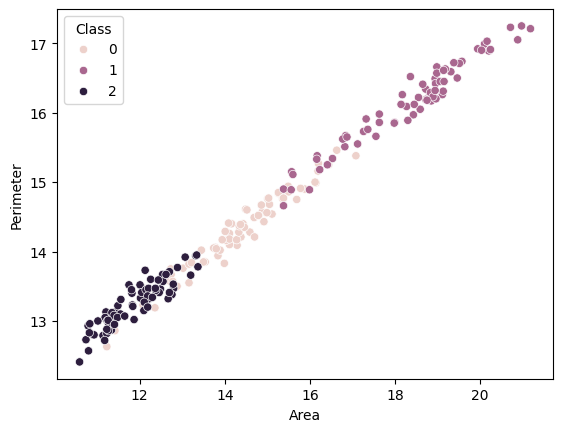

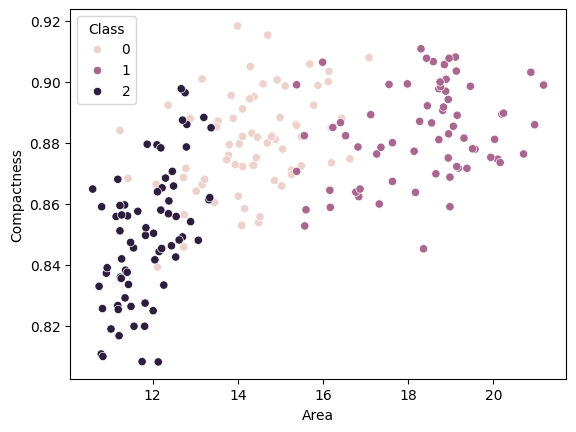

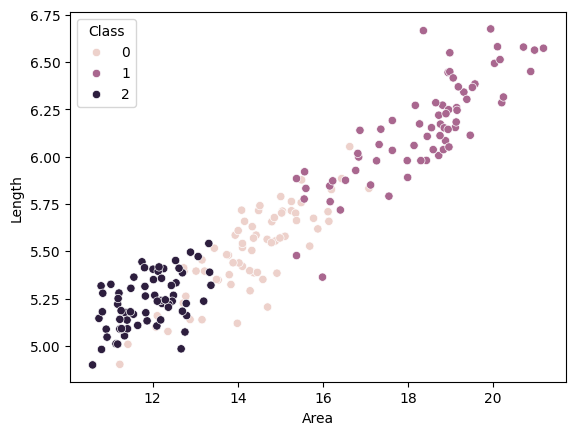

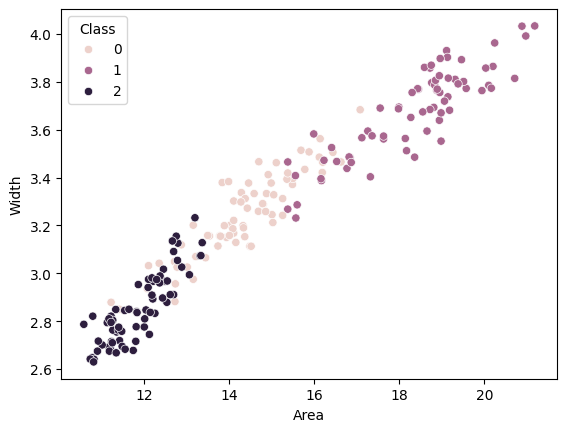

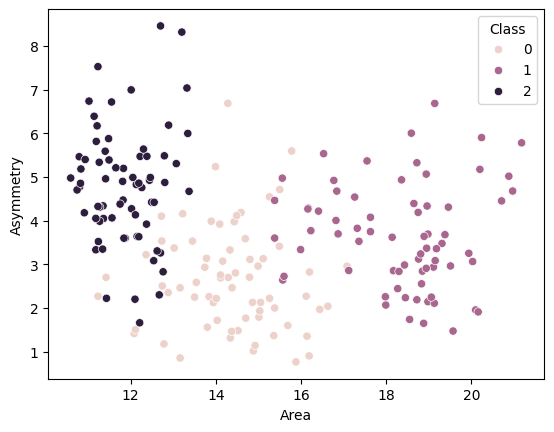

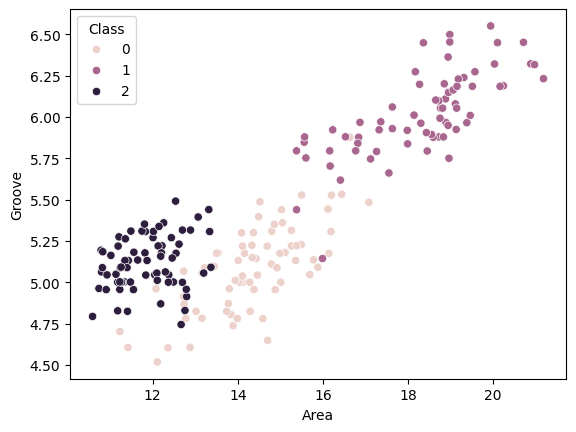

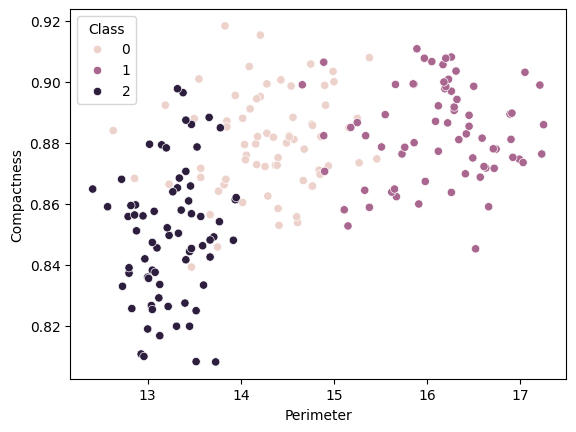

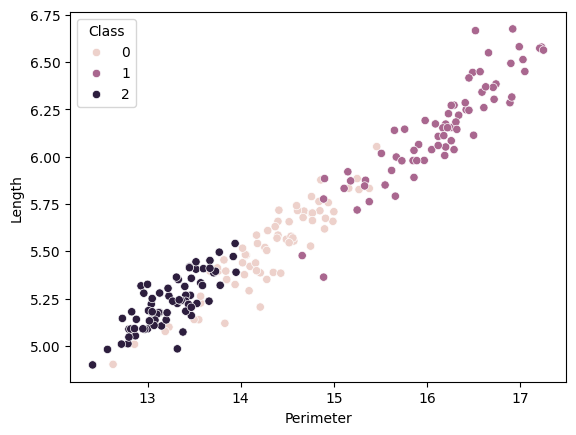

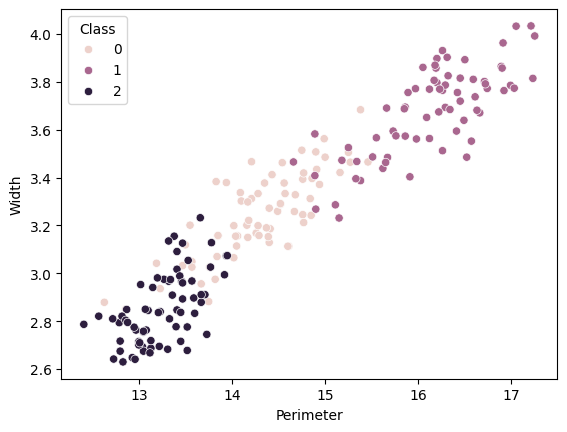

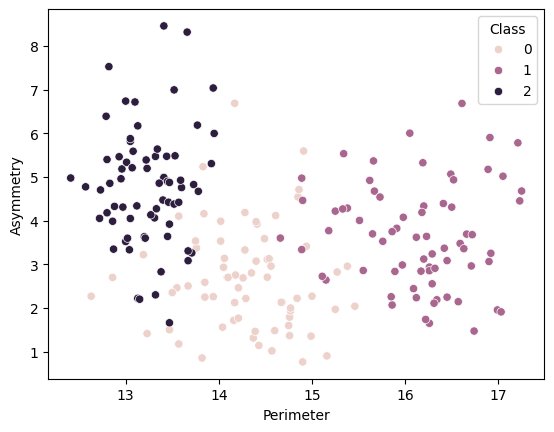

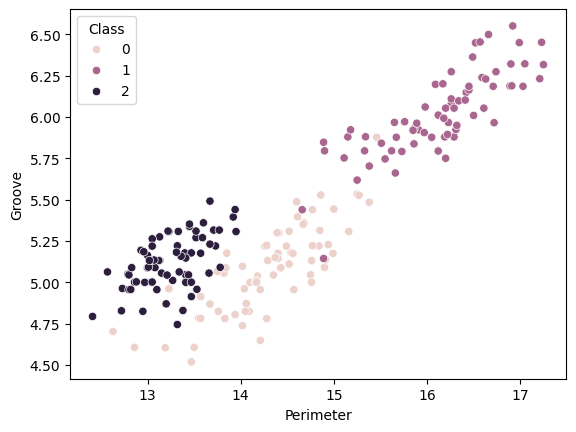

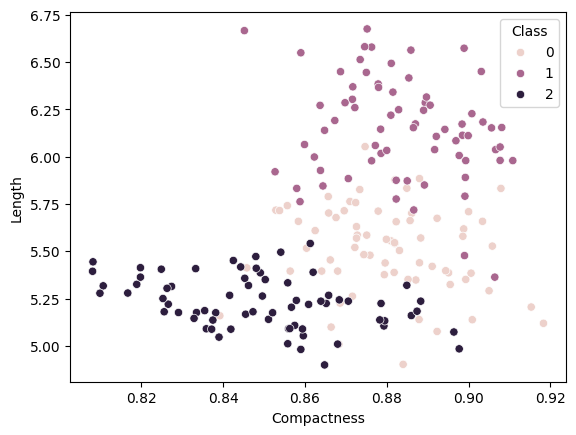

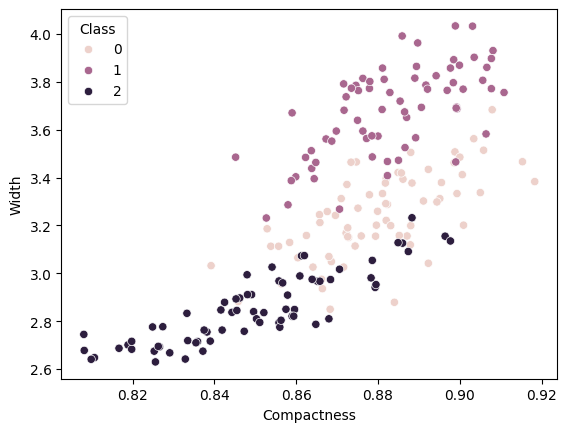

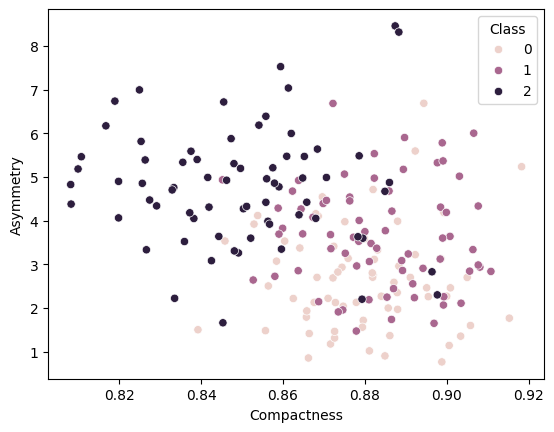

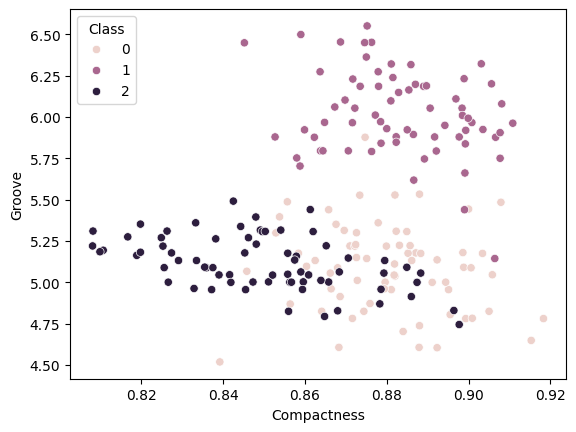

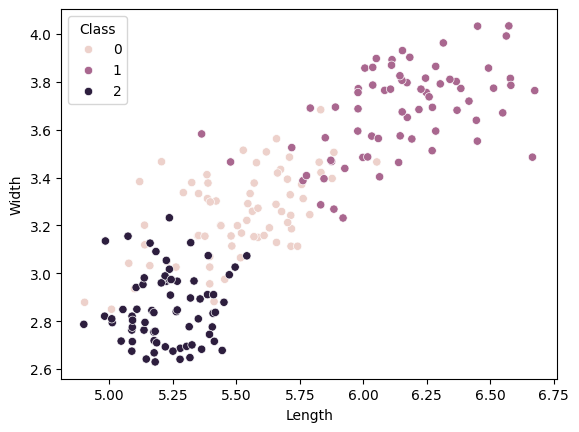

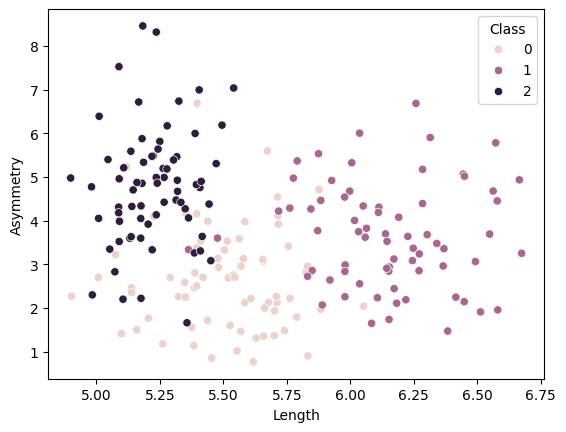

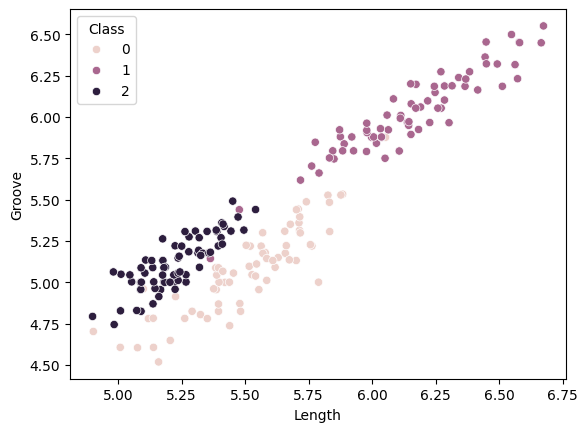

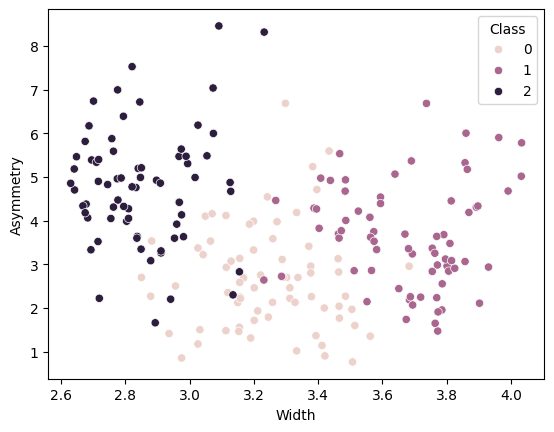

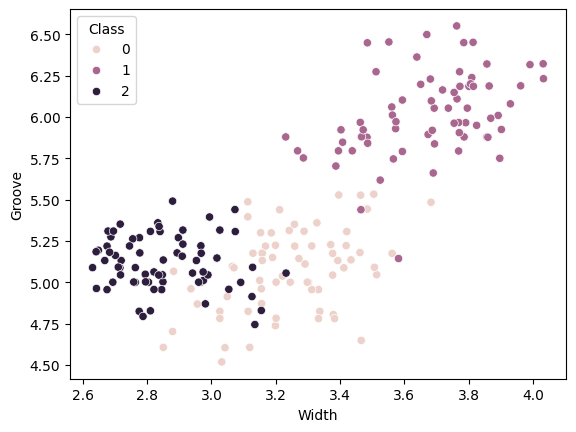

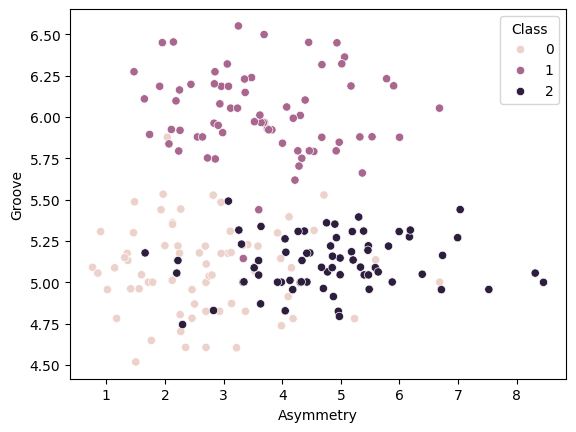

In [8]:
for i in range(len(cols)-1):
  for j in range(i+1, len(cols)-1):
    x_label = cols[i]
    y_label = cols[j]
    sns.scatterplot(x=x_label, y=y_label, data=df, hue='Class')  # we separate the classes into different hue 
    plt.show()                                                   # to understand the classes they are in


By examine the plots we can determine weather the features can be used to separate the wheat type by clusters or not 
because some are developing clusters and some are completely overlapping

# Clustering

In [9]:
from sklearn.cluster import KMeans

In [10]:
# K-Means with Single Dimension of our choise

In [11]:
x = 'Asymmetry'
y = 'Perimeter'

X = df[[x,y]].values

In [12]:
kmeans = KMeans(n_clusters=3).fit(X)

In [13]:
clusters = kmeans.labels_
clusters  # This give us the prediction of all the clusters

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 2, 2, 2, 1, 1, 2, 0, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 2, 1, 2, 2, 1, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 2,
       0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0])

In [14]:
df['Class'].values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [15]:
cluster_df = pd.DataFrame(np.hstack((X, clusters.reshape(-1, 1))), columns=[x, y, "Class"])

In [16]:
cluster_df

,Asymmetry,Perimeter,Class
0,2.221,14.84,2.0
1,1.018,14.57,2.0
2,2.699,14.09,2.0
3,2.259,13.94,2.0
4,1.355,14.99,2.0
...,...,...,...
205,3.631,13.20,0.0
206,4.325,12.88,0.0
207,8.315,13.66,0.0
208,3.598,13.21,0.0


[]

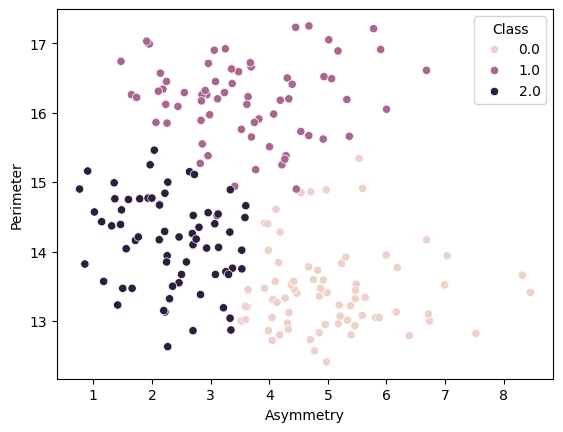

In [17]:
# K Means classes
sns.scatterplot(x=x, y=y, data=cluster_df, hue='Class')
plt.plot()

[]

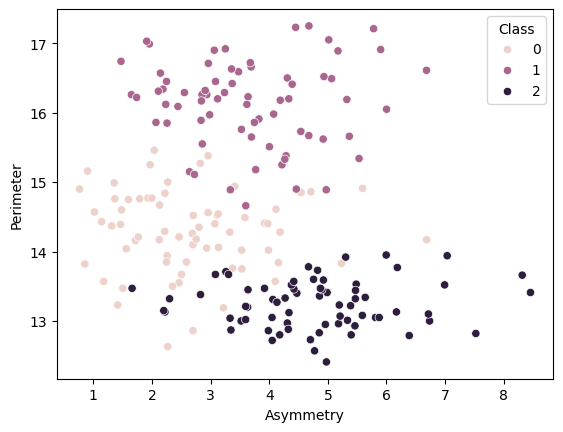

In [18]:
# Original classes
sns.scatterplot(x=x, y=y, data=df, hue='Class')
plt.plot()

# K-Means with Higher Dimensions (All 7 Dimension included)

In [19]:
X = df[cols[:-1]].values

In [20]:
kmeans = KMeans(n_clusters = 3).fit(X)
clusters = kmeans.labels_


In [21]:
cluster_df = pd.DataFrame(np.hstack((X, clusters.reshape(-1, 1))), columns=df.columns)

[]

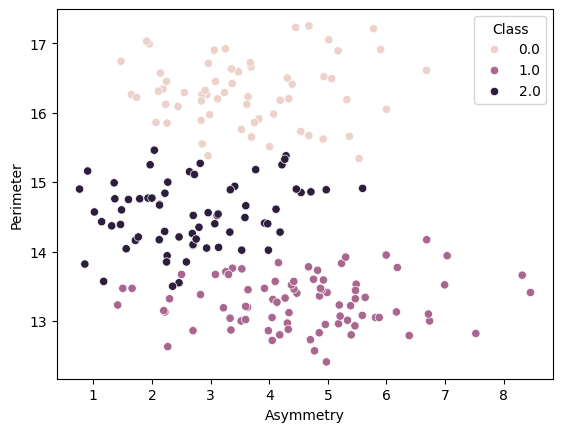

In [22]:
# K Means classes
sns.scatterplot(x=x, y=y, data=cluster_df, hue='Class')
plt.plot()

[]

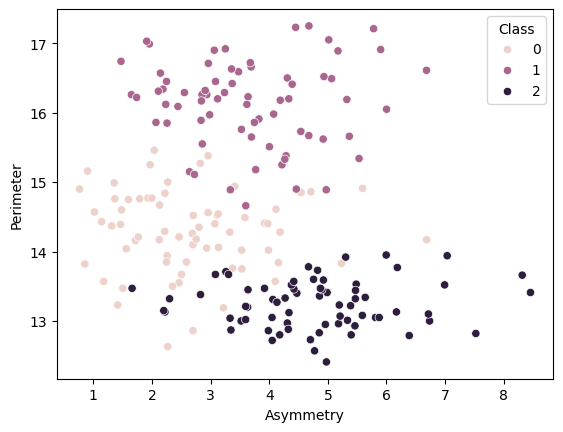

In [23]:
# Original classes
sns.scatterplot(x=x, y=y, data=df, hue='Class')
plt.plot()

# PCA

In [24]:
from sklearn.decomposition import PCA

In [25]:
pca = PCA(n_components=2)   # All dimensions to 2 dimensions
X = df[cols[:-1]].values    # All features expect last one (class) 
transformed_x = pca.fit_transform(X)

In [26]:
X.shape

(210, 7)

In [27]:
transformed_x.shape

(210, 2)

In [28]:
transformed_x[:5]  # first 5 rows : its not a pandas df but numpy array so we lookup with this syntax

array([[ 0.66344838, -1.41732098],
       [ 0.31566651, -2.68922915],
       [-0.6604993 , -1.13150635],
       [-1.0552759 , -1.62119002],
       [ 1.61999921, -2.18338442]])

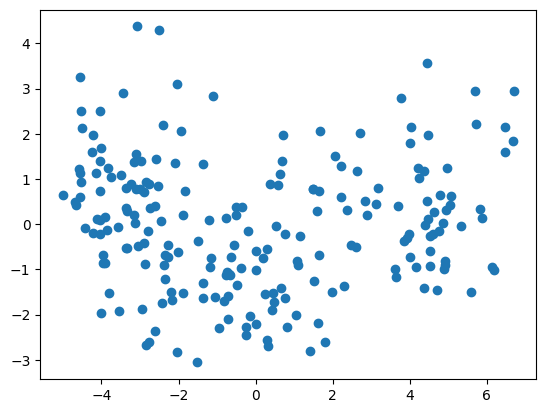

In [29]:
plt.scatter(transformed_x[:,0], transformed_x[:,1])
plt.show()

In [30]:
kmeans_pca_df = pd.DataFrame(np.hstack((transformed_x, kmeans.labels_.reshape(-1, 1))), columns=["pca1", "pca2", "Class"])
kmeans_pca_df 

,pca1,pca2,Class
0,0.663448,-1.417321,2.0
1,0.315667,-2.689229,2.0
2,-0.660499,-1.131506,2.0
3,-1.055276,-1.621190,2.0
4,1.619999,-2.183384,2.0
...,...,...,...
205,-3.041872,-0.473126,1.0
206,-4.109063,0.109341,1.0
207,-2.500034,4.307965,1.0
208,-3.332079,-0.525290,1.0


In [31]:
truth_pca_df = pd.DataFrame(np.hstack((transformed_x, df["Class"].values.reshape(-1, 1))), columns=["pca1", "pca2", "Class"])

In [32]:
truth_pca_df 

,pca1,pca2,Class
0,0.663448,-1.417321,0.0
1,0.315667,-2.689229,0.0
2,-0.660499,-1.131506,0.0
3,-1.055276,-1.621190,0.0
4,1.619999,-2.183384,0.0
...,...,...,...
205,-3.041872,-0.473126,2.0
206,-4.109063,0.109341,2.0
207,-2.500034,4.307965,2.0
208,-3.332079,-0.525290,2.0


[]

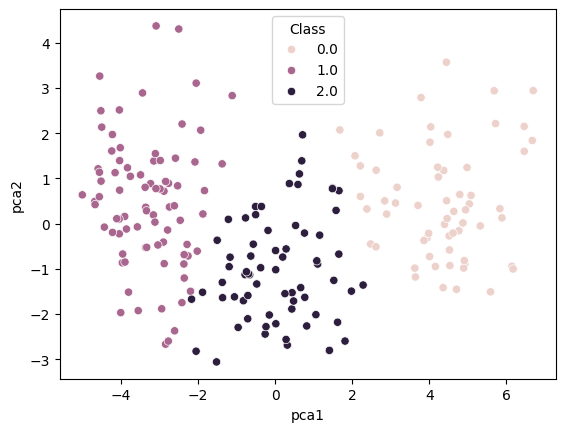

In [33]:
# K Means classes
sns.scatterplot(x="pca1", y="pca2", hue='Class', data=kmeans_pca_df)
plt.plot()

[]

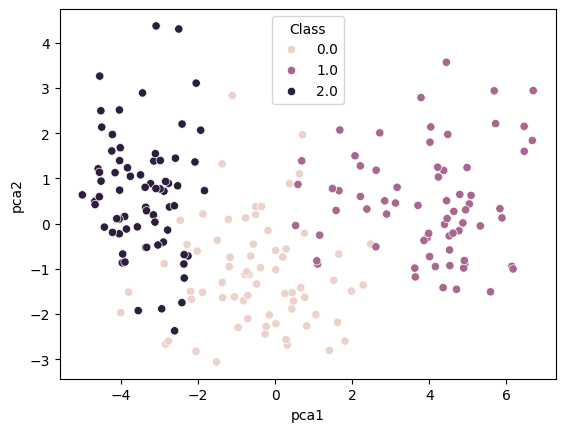

In [34]:
# Truth classes
sns.scatterplot(x="pca1", y="pca2", hue='Class', data=truth_pca_df)
plt.plot()